In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import graphviz

In [2]:
# df = pd.read_parquet("../../../Data/2022_indicators/processed_Dummies_Stand_2022.parquet")
df = pd.read_parquet("../../../Data/2022_indicators/processed_Dummies_Stand_2022_LessThan40.parquet")
df

,_STATE_1.0,_STATE_6.0,_STATE_9.0,_STATE_12.0,_STATE_13.0,_STATE_15.0,_STATE_17.0,_STATE_18.0,_STATE_20.0,_STATE_21.0,...,SLEPTIM1,HTIN4,_LLCPWT2,HEIGHT3,PHYSHLTH,WTKG3,WEIGHT2,_PSU,_AGE80,_MICHD
2087,1,0,0,0,0,0,0,0,0,0,...,0.053732,-0.791858,1.120740,-0.442285,-1.498830,0.780356,0.076879,-1.142471,-1.016613,2.0
2088,1,0,0,0,0,0,0,0,0,0,...,-0.241227,0.177143,1.252981,-0.338735,-0.776594,0.069398,-0.025487,-1.142257,0.380796,1.0
2090,1,0,0,0,0,0,0,0,0,0,...,-0.241227,-1.276358,1.120740,-0.494060,0.774874,-0.145741,-0.056507,-1.141831,-0.118279,2.0
2091,1,0,0,0,0,0,0,0,0,0,...,-0.093747,-0.065107,1.120740,-0.364623,-1.525579,-0.102998,-0.050303,-1.141618,-1.415873,2.0
2093,1,0,0,0,0,0,0,0,0,0,...,-0.241227,0.419393,1.120740,-0.312848,-1.552329,-1.007724,-0.180588,-1.141191,-0.717168,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431675,0,0,0,0,0,0,0,0,0,0,...,-0.093747,-0.307357,-0.126412,-0.390510,-1.525579,-0.038409,-0.040997,0.814725,0.580426,2.0
431676,0,0,0,0,0,0,0,0,0,0,...,0.053732,-0.307357,0.128715,-0.390510,0.774874,-0.404573,-0.093731,0.814939,-0.018464,2.0
431677,0,0,0,0,0,0,0,0,0,0,...,0.053732,0.903894,-0.126412,-0.261073,-1.445331,0.823574,0.083083,0.815152,-1.216243,2.0
431680,0,0,0,0,0,0,0,0,0,0,...,-0.241227,-1.276358,0.111935,-0.494060,-1.552329,-1.222863,-0.211608,0.815791,-1.515688,2.0


In [3]:
duplicate_cols_to_drop = ["_RFHLTH_1.0",  "_SEX_2.0", "GENHLTH_2.0",  "GENHLTH_5.0", "GENHLTH_3.0", "_SEX_1.0", "CELLSEX1_2.0", "CELLSEX1_1.0", "_LLCPWT", "_PSU", "_EXTETH3_1.0", "HAVARTH4_1.0", "_RACEPR1_2.0", "RMVTETH4_3.0" ]
df = df.drop(duplicate_cols_to_drop, axis=1)
df

,_STATE_1.0,_STATE_6.0,_STATE_9.0,_STATE_12.0,_STATE_13.0,_STATE_15.0,_STATE_17.0,_STATE_18.0,_STATE_20.0,_STATE_21.0,...,DROCDY4_,SLEPTIM1,HTIN4,_LLCPWT2,HEIGHT3,PHYSHLTH,WTKG3,WEIGHT2,_AGE80,_MICHD
2087,1,0,0,0,0,0,0,0,0,0,...,-0.117906,0.053732,-0.791858,1.120740,-0.442285,-1.498830,0.780356,0.076879,-1.016613,2.0
2088,1,0,0,0,0,0,0,0,0,0,...,-0.301975,-0.241227,0.177143,1.252981,-0.338735,-0.776594,0.069398,-0.025487,0.380796,1.0
2090,1,0,0,0,0,0,0,0,0,0,...,-0.301975,-0.241227,-1.276358,1.120740,-0.494060,0.774874,-0.145741,-0.056507,-0.118279,2.0
2091,1,0,0,0,0,0,0,0,0,0,...,-0.226182,-0.093747,-0.065107,1.120740,-0.364623,-1.525579,-0.102998,-0.050303,-1.415873,2.0
2093,1,0,0,0,0,0,0,0,0,0,...,0.780781,-0.241227,0.419393,1.120740,-0.312848,-1.552329,-1.007724,-0.180588,-0.717168,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431675,0,0,0,0,0,0,0,0,0,0,...,-0.150389,-0.093747,-0.307357,-0.126412,-0.390510,-1.525579,-0.038409,-0.040997,0.580426,2.0
431676,0,0,0,0,0,0,0,0,0,0,...,0.239403,0.053732,-0.307357,0.128715,-0.390510,0.774874,-0.404573,-0.093731,-0.018464,2.0
431677,0,0,0,0,0,0,0,0,0,0,...,0.163610,0.053732,0.903894,-0.126412,-0.261073,-1.445331,0.823574,0.083083,-1.216243,2.0
431680,0,0,0,0,0,0,0,0,0,0,...,-0.193699,-0.241227,-1.276358,0.111935,-0.494060,-1.552329,-1.222863,-0.211608,-1.515688,2.0


In [4]:
df._MICHD.value_counts()

2.0    108922
1.0     13898
Name: _MICHD, dtype: int64

In [5]:
target = df._MICHD
sample_size = target.value_counts()[1.0]

target_true_df = df[df['_MICHD'] == 2.0]
filtered_df = target_true_df.sample(n=sample_size, random_state=42)  
filtered_df = pd.concat([filtered_df, df[df._MICHD == 1.0]], axis=0)
filtered_df


,_STATE_1.0,_STATE_6.0,_STATE_9.0,_STATE_12.0,_STATE_13.0,_STATE_15.0,_STATE_17.0,_STATE_18.0,_STATE_20.0,_STATE_21.0,...,DROCDY4_,SLEPTIM1,HTIN4,_LLCPWT2,HEIGHT3,PHYSHLTH,WTKG3,WEIGHT2,_AGE80,_MICHD
55717,0,0,1,0,0,0,0,0,0,0,...,-0.301975,0.201212,0.177143,-0.133986,-0.338735,0.774874,-0.145741,-0.056507,0.280981,2.0
81737,0,0,0,0,1,0,0,0,0,0,...,-0.269492,0.053732,-0.549607,0.118888,-0.416398,0.774874,0.565217,0.045859,1.478761,2.0
319442,0,0,0,0,0,0,0,0,0,0,...,-0.161217,-0.683666,0.177143,-0.431132,-0.338735,-0.776594,2.115836,0.269203,-0.717168,2.0
137908,0,0,0,0,0,0,0,0,0,1,...,-0.301975,-0.241227,-1.034108,-0.080046,-0.468172,0.774874,-0.361355,-0.087527,-1.715318,2.0
354443,0,0,0,0,0,0,0,0,0,0,...,-0.193699,-0.093747,-0.065107,3.357101,-0.364623,-1.525579,-0.533752,-0.112343,0.380796,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431639,0,0,0,0,0,0,0,0,0,0,...,-0.226182,-0.093747,0.177143,-0.126412,-0.338735,0.774874,0.715767,0.067573,1.778206,1.0
431656,0,0,0,0,0,0,0,0,0,0,...,-0.269492,0.201212,-0.307357,-0.126412,-0.390510,0.774874,-0.576970,-0.118547,1.578576,1.0
431659,0,0,0,0,0,0,0,0,0,0,...,-0.301975,10.229837,0.419393,-0.182359,-0.312848,-0.776594,-0.662931,-0.130956,-1.415873,1.0
431662,0,0,0,0,0,0,0,0,0,0,...,-0.193699,-0.093747,1.872895,-0.126412,2.120568,-1.525579,2.094464,0.266101,0.081351,1.0


In [6]:
target_filtered = filtered_df._MICHD
target_filtered

55717     2.0
81737     2.0
319442    2.0
137908    2.0
354443    2.0
         ... 
431639    1.0
431656    1.0
431659    1.0
431662    1.0
431666    1.0
Name: _MICHD, Length: 27796, dtype: float64

In [7]:
filtered_df = filtered_df.drop("_MICHD", axis =1)
df = filtered_df
target = target_filtered
# df

In [8]:
# # create logistic regressor 
lregCV = LogisticRegressionCV(n_jobs=-1,penalty='l1',solver='saga',max_iter=10000)
# # l1 - drives some of the features to 0 because - absolute value 
# # l2 - will just make weights small - square 

In [9]:
# # fit decision tree classifier
lregCV.fit(df,target)

LogisticRegressionCV(max_iter=10000, n_jobs=-1, penalty='l1', solver='saga')

In [10]:
# compute accuracy rate
accuracy_rate = lregCV.score(df,target)
print('accuracy rate',accuracy_rate.round(2))

accuracy rate 0.73


In [11]:
# # feature coefficients
coef = lregCV.coef_[0]
coef = pd.Series(coef,index=df.columns).sort_values(ascending=False)

In [12]:
coef

CVDSTRK3_2.0    0.674171
GENHLTH_1.0     0.423359
CHCCOPD3_2.0    0.316742
DIABETE4_3.0    0.313035
CHCKDNY2_2.0    0.186300
                  ...   
SMOKE100_1.0   -0.184934
PERSDOC3_2.0   -0.418901
_AGE80         -0.482481
_RFHLTH_2.0    -0.596696
SEXVAR_1.0     -0.603852
Length: 496, dtype: float64

In [13]:
columns_to_zero = coef[coef ==0.0].index
columns_to_zero = pd.DataFrame({'Columns': columns_to_zero})
columns_to_zero.to_parquet('../../../Data/2022_indicators/l1_columnsToZero.parquet')
columns_to_zero


,Columns
0,_MENT14D_9.0
1,_PHYS14D_9.0
2,_HLTHPLN_2.0
3,_HLTHPLN_9.0
4,_MENT14D_3.0
...,...
464,EDUCA_2.0
465,EDUCA_1.0
466,MARITAL_9.0
467,MARITAL_6.0


In [14]:
df = df.drop(columns_to_zero.Columns, axis=1)
df.shape

(27796, 27)

In [15]:
coef = coef[coef != 0.0]
coef.sort_values(ascending=False)

CVDSTRK3_2.0    0.674171
GENHLTH_1.0     0.423359
CHCCOPD3_2.0    0.316742
DIABETE4_3.0    0.313035
CHCKDNY2_2.0    0.186300
DIFFWALK_2.0    0.172735
RMVTETH4_8.0    0.132806
EMPLOY1_1.0     0.132639
PHYSHLTH        0.086390
LASTDEN4_1.0    0.077054
_DENVST3_1.0    0.077054
SEXVAR_2.0      0.061284
PRIMINSR_1.0    0.010148
_BMI5          -0.009789
EMPLOY1_8.0    -0.024199
WTKG3          -0.041740
_EXTETH3_2.0   -0.049091
ALCDAY4        -0.073405
DIABETE4_1.0   -0.100384
CHECKUP1_1.0   -0.127167
PNEUVAC4_1.0   -0.151466
_DRDXAR2_1.0   -0.168703
SMOKE100_1.0   -0.184934
PERSDOC3_2.0   -0.418901
_AGE80         -0.482481
_RFHLTH_2.0    -0.596696
SEXVAR_1.0     -0.603852
dtype: float64

In [16]:
coef_df = pd.DataFrame({'coef': coef})
coef_df.to_parquet('../../../Data/2022_indicators/coef_no_zeros.parquet')
coef_df.head()

,coef
CVDSTRK3_2.0,0.674171
GENHLTH_1.0,0.423359
CHCCOPD3_2.0,0.316742
DIABETE4_3.0,0.313035
CHCKDNY2_2.0,0.186300


In [17]:
feature_dict= {
    "CVDSTRK3_2.0": "No Stroke",
    "GENHLTH_1.0": "General Health: Excellent",
    "CHCKDNY2_2.0":"No Kidney Disease",
    "DIABETE4_3.0": "No diabetes",
    "SEXVAR_2.0":  "Female", 
    "CHCCOPD3_2.0": "No C.O.P.D.",
    "PERSDOC3_1.0": "Has Personal Health Care Provider", 
    "PERSDOC3_3.0": "No Personal Health Care Provider",
    "SEXVAR_1.0": "Male", 
    "DIABETE4_1.0": "Has Diabetes", 
    "CHCKDNY2_1.0": "Has Kidney Disease",
    "CHECKUP1_1.0": "Last Visited Doc in past Year",
    "GENHLTH_4.0": "Fair General Health",
    "_RFHLTH_2.0": "Adults Fair or Poor Health",
    "PERSDOC3_2.0": "1+ Heath Provider",
    "CVDSTRK3_1.0": "Had a Stroke",
    "_AGE80": "Age",
    "EMPLOY1_1.0": "Employed For Wages",
    "MARITAL_5.0": "Never Married",
    "CHCCOPD3_1.0": "Has C.O.P.D",
    "_AGEG5YR_13.0": "Age 80+", 
    "DIFFWALK_1.0": "Has Difficulty Walking",
    "HAVARTH4_2.0": "No Arthritis",
    "_PRACE2_3.0": "Indian or Alaskan Native",
    "DIFFWALK_2.0": "No Difficulty Walking",
    "PNEUVAC4_2.0": "Never Received Pneumococcal Vaccine",
    "PNEUVAC4_1.0": "Received Pneumococcal Vaccine",
    "DROCDY4_":  "Daily Drinks",
    "_DRDXAR2_2.0": "No Arthritis",
    "RMVTETH4_3.0": "Number of Teeth Removed",
    "PHYSHLTH": "Healthy Days (30 Days)",
    "_BMI5":"BMI", 
    "_DENVST3_1.0": "Visited the Dentist in Past Year",
    "_EXTETH3_1.0": "Adult Had Permanent Teeth Extracted",
    "MEDCOST1_2.0": "Couldn't Pay for Doc in past Year", 
    "LASTDEN4_1.0": "Time Since Last Dentist Visit", 
    "RMVTETH4_8.0": "No Teeth Removed", 
    "RMVTETH4_1.0": "1-5 Teeth Removed",
    "ADDEPEV3_2.0": "No Depressive Disorder",
    "_RACEG22_2.0": "Non-White or Hispanic", 
    "_RACEPR1_2.0": "Race: Black",
    "_IMPRACE_2.0": "Race: Black",
    "_RFBMI5_1.0": "BMI <= 25.00",
    "_METSTAT_2.0" : "Nonmetropolitan", 
    "WEIGHT2": "Weight",
    "_HADSIGM_1.0": "Had Sigmoidoscopy",
    "CHCSCNC1_1.0": "Had Skin Cancer (not Melanoma)",
    "RMVTETH4_2.0": "6+ Teeth Extracted",
    "COVIDPOS_1.0": "Had COVID",
    "LASTDEN4_4.0": "5+ Years Since Dentist",
    "_SMOKGRP_2.0": "Former smoker, 20+ Pack Years, quit < 15 years",
    "_EXTETH3_2.0": "18+ at Risk Has Teeth Extracted",
    "HAVARTH4_1.0": "Has Arthritis",
    "_DRDXAR2_1.0": "Has Arthritis",
    "_RFBMI5_2.0": "BMI > 25.00",
    "SMOKE100_1.0": "Smoked 100+ cigarettes",
    "PRIMINSR_1.0": "Health Insurance: Employer",
    "BLIND_2.0": "Not Blind",
    "DEAF_2.0": "Not Deaf",
    "SMOKE100_2.0": "Smoked <100 Cigarettes",
    "_SMOKER3_4.0": "Never Smoked",
    "_SMOKGRP_4.0": "Never Smoked",
    "EMPLOY1_8.0": "Unable to Work",
    "ECIGNOW2_1.0" : "Never Used E-Cigarettes",
    "WTKG3": "Weight (kg)"
    
}

# duplicate_cols_to_drop = ["_RFHLTH_1.0",  "_SEX_2.0", "GENHLTH_2.0",  "GENHLTH_5.0", "GENHLTH_3.0" ]

In [18]:
mapped_columns = [feature_dict[col] if col in feature_dict else col for col in coef.index]
coef.index = mapped_columns
# mapped_columns

No Stroke                           0.674171
General Health: Excellent           0.423359
No C.O.P.D.                         0.316742
No diabetes                         0.313035
No Kidney Disease                   0.186300
No Difficulty Walking               0.172735
No Teeth Removed                    0.132806
Employed For Wages                  0.132639
Healthy Days (30 Days)              0.086390
Time Since Last Dentist Visit       0.077054
Visited the Dentist in Past Year    0.077054
Female                              0.061284
Health Insurance: Employer          0.010148
BMI                                -0.009789
Unable to Work                     -0.024199
Weight (kg)                        -0.041740
18+ at Risk Has Teeth Extracted    -0.049091
ALCDAY4                            -0.073405
Has Diabetes                       -0.100384
Last Visited Doc in past Year      -0.127167
Received Pneumococcal Vaccine      -0.151466
Has Arthritis                      -0.168703
Smoked 100

<Axes: >

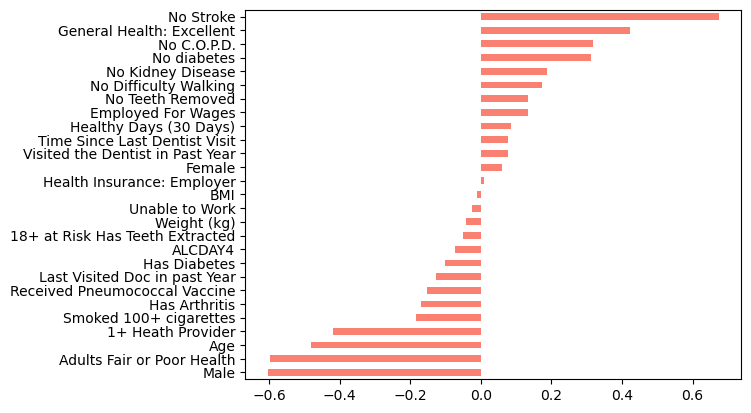

In [19]:
display(coef.sort_values(ascending=False))
coef.sort_values(ascending=True).plot.barh(color='salmon')
# plt.xlabel('feature weights')

In [20]:
# filtered_coef = pd.concat([coef.head(15), coef.tail(15)])
# display(filtered_coef.sort_values(ascending=False))
# filtered_coef.sort_values(ascending=True).plot.barh(color='salmon')
# plt.xlabel('feature weights')

In [21]:
# initialize tree
dtree = DecisionTreeClassifier(random_state=0)

# define parameter grid to search for lowest validation error rate
parameters = {'max_depth':[1,2,3,4,5,6,7,8,9,10]}

# initialize cross-validation
dtreeCV = GridSearchCV(dtree,
                      param_grid=parameters,
                      return_train_score=True,
                      n_jobs=-1)

In [22]:
# fit tree using cross-validation to select best tree
dtreeCV.fit(df,target)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             return_train_score=True)

In [23]:
# readout best parameter value
dtreeCV.best_params_

{'max_depth': 6}

In [24]:
acc = dtreeCV.score(df,target)
print('accuracy on training set',acc.round(3))
print("Validation Score", dtreeCV.best_score_)
print("Baseline", (target.value_counts()[2.0] / target.value_counts().sum()))

accuracy on training set 0.721
Validation Score 0.7115767418445168
Baseline 0.5


In [25]:
target.value_counts()

2.0    13898
1.0    13898
Name: _MICHD, dtype: int64

In [26]:
dtree = dtreeCV.best_estimator_
feature_importances = dtree.feature_importances_
feature_importances = pd.Series(feature_importances,index=df.columns).sort_values(ascending=False)

In [27]:
mapped_columns = [feature_dict[col] if col in feature_dict else col for col in feature_importances.index]
feature_importances.index = mapped_columns
feature_importances = feature_importances[feature_importances.values >0]
feature_importances

Adults Fair or Poor Health          0.350094
Age                                 0.300511
Female                              0.069639
No Stroke                           0.067673
Has Diabetes                        0.057318
No C.O.P.D.                         0.038590
General Health: Excellent           0.036604
1+ Heath Provider                   0.036288
Male                                0.010458
No Kidney Disease                   0.007284
Unable to Work                      0.005721
Smoked 100+ cigarettes              0.004264
Employed For Wages                  0.002497
Weight (kg)                         0.002472
Has Arthritis                       0.001951
Health Insurance: Employer          0.001769
Visited the Dentist in Past Year    0.001718
No Difficulty Walking               0.001590
ALCDAY4                             0.001505
18+ at Risk Has Teeth Extracted     0.001010
BMI                                 0.000595
Healthy Days (30 Days)              0.000449
dtype: flo

In [37]:
len(feature_importances)

22

Text(0.5, 1.0, 'Feature Importance')

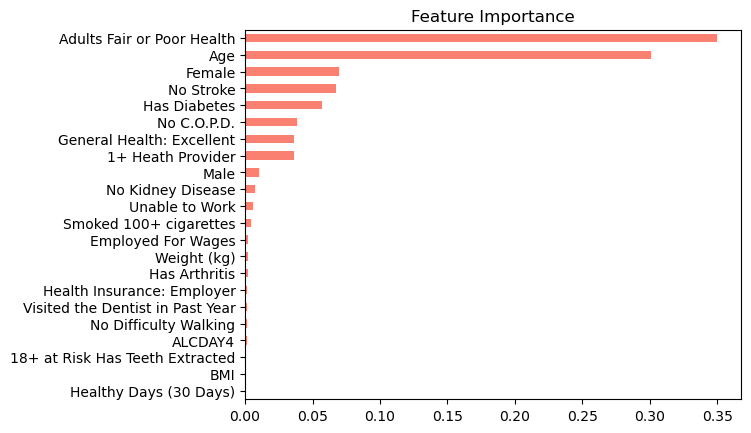

In [40]:
feature_importances.sort_values().plot.barh(color='salmon')
plt.title('Feature Importance')

In [29]:
df.rename(columns=feature_dict, inplace=True)



In [30]:
dtree_string = export_text(dtree,feature_names=list(df.columns),decimals=1,spacing=5)
print(dtree_string)

|----- Adults Fair or Poor Health <= 0.5
|     |----- Age <= 0.2
|     |     |----- Has Diabetes <= 0.5
|     |     |     |----- No Stroke <= 0.5
|     |     |     |     |----- ALCDAY4 <= -0.8
|     |     |     |     |     |----- Age <= -1.7
|     |     |     |     |     |     |----- class: 2.0
|     |     |     |     |     |----- Age >  -1.7
|     |     |     |     |     |     |----- class: 1.0
|     |     |     |     |----- ALCDAY4 >  -0.8
|     |     |     |     |     |----- BMI <= 1.0
|     |     |     |     |     |     |----- class: 1.0
|     |     |     |     |     |----- BMI >  1.0
|     |     |     |     |     |     |----- class: 2.0
|     |     |     |----- No Stroke >  0.5
|     |     |     |     |----- No C.O.P.D. <= 0.5
|     |     |     |     |     |----- Unable to Work <= 0.5
|     |     |     |     |     |     |----- class: 2.0
|     |     |     |     |     |----- Unable to Work >  0.5
|     |     |     |     |     |     |----- class: 1.0
|     |     |     |     |----- N

In [31]:
# initialize tree
dtree_deep3 = DecisionTreeClassifier(max_depth=3)
dtree_deep3.fit(df, target)
dtree_string = export_text(dtree_deep3,feature_names=list(df.columns),decimals=1,spacing=5)
print(dtree_string)


|----- Adults Fair or Poor Health <= 0.5
|     |----- Age <= 0.2
|     |     |----- Has Diabetes <= 0.5
|     |     |     |----- class: 2.0
|     |     |----- Has Diabetes >  0.5
|     |     |     |----- class: 2.0
|     |----- Age >  0.2
|     |     |----- Female <= 0.5
|     |     |     |----- class: 1.0
|     |     |----- Female >  0.5
|     |     |     |----- class: 2.0
|----- Adults Fair or Poor Health >  0.5
|     |----- Age <= 0.1
|     |     |----- No C.O.P.D. <= 0.5
|     |     |     |----- class: 1.0
|     |     |----- No C.O.P.D. >  0.5
|     |     |     |----- class: 1.0
|     |----- Age >  0.1
|     |     |----- No Stroke <= 0.5
|     |     |     |----- class: 1.0
|     |     |----- No Stroke >  0.5
|     |     |     |----- class: 1.0



_MICHD:    
1.0: Have coronary heart disease (CHD) or myocardial infarction (MI)      
2.0: Do NOT Have coronary heart disease (CHD) or myocardial infarction (MI)     

In [32]:
target

55717     2.0
81737     2.0
319442    2.0
137908    2.0
354443    2.0
         ... 
431639    1.0
431656    1.0
431659    1.0
431662    1.0
431666    1.0
Name: _MICHD, Length: 27796, dtype: float64

In [33]:

result = pd.concat([df, target], axis=1)
result

,Male,Female,General Health: Excellent,Health Insurance: Employer,1+ Heath Provider,Last Visited Doc in past Year,Time Since Last Dentist Visit,No Teeth Removed,No Stroke,No C.O.P.D.,...,Adults Fair or Poor Health,18+ at Risk Has Teeth Extracted,Visited the Dentist in Past Year,Has Arthritis,BMI,ALCDAY4,Healthy Days (30 Days),Weight (kg),Age,_MICHD
55717,1,0,0,0,0,1,1,1,1,1,...,0,0,1,0,-0.243547,1.091122,0.774874,-0.145741,0.280981,2.0
81737,0,1,0,0,0,1,1,1,1,1,...,0,0,1,1,1.025970,-0.834236,0.774874,0.565217,1.478761,2.0
319442,1,0,0,0,0,1,1,1,1,1,...,0,0,1,1,2.267170,-0.825828,-0.776594,2.115836,-0.717168,2.0
137908,0,1,0,1,0,0,0,1,1,1,...,0,0,0,0,0.187491,1.091122,0.774874,-0.361355,-1.715318,2.0
354443,0,1,0,0,0,1,1,1,1,1,...,0,0,1,0,-0.558173,-0.828631,-1.525579,-0.533752,0.380796,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431639,1,0,1,0,0,1,1,1,1,1,...,0,0,1,0,0.712917,-0.831433,0.774874,0.715767,1.778206,1.0
431656,1,0,0,0,0,1,1,1,1,1,...,0,0,1,1,-0.487383,-0.834236,0.774874,-0.576970,1.578576,1.0
431659,1,0,0,0,1,1,0,1,1,0,...,1,0,0,0,-0.924713,1.091122,-0.776594,-0.662931,-1.415873,1.0
431662,1,0,0,1,0,1,1,1,1,1,...,0,0,1,0,1.035408,-0.828631,-1.525579,2.094464,0.081351,1.0


<Axes: xlabel='Age'>

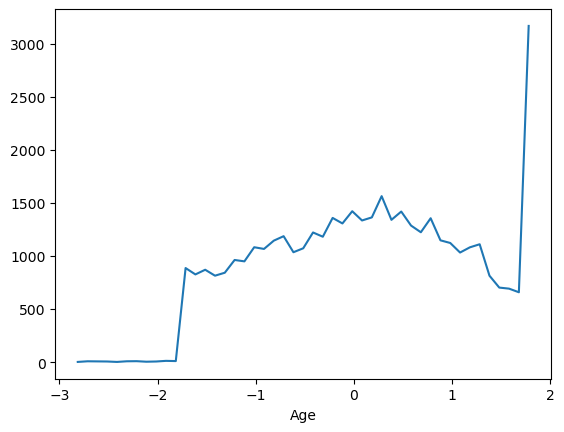

In [34]:
age_grp = result.groupby(by='Age')
age_grp._MICHD.sum().plot()

In [35]:
# conda install graphviz

In [36]:
# display tree
dot_data = export_graphviz(dtree_deep3,
            out_file=None,
            feature_names=df.columns,
            # class_names = ['bad','good'],
            proportion=True,
            impurity=False,
            filled=True,
            rounded=True)
graph = graphviz.Source(dot_data)
# graph.render('RedWine')
graph

NameError: name 'export_graphviz' is not defined